Objective: sales forecasting with 
    * linear regression
    * random forest regressor
    * XGBoost
    * LSTM
    * ARIMA
    
Inspo: https://towardsdatascience.com/predicting-sales-611cb5a252de
Data: 

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Load and View Data

In [5]:
def load_data():  
    return pd.read_csv('../data/train.csv')  

sales_data = load_data()

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null object
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
sales_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# Determining Stationarity

In [8]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

In [11]:
monthly_df = monthly_sales(sales_data)

In [12]:
def time_plot(data, x_col, y_col):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax)
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = "Daily Sales: 2013 - 2018")
    
    sns.despine()

/Users/mollyliebeskind/opt/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


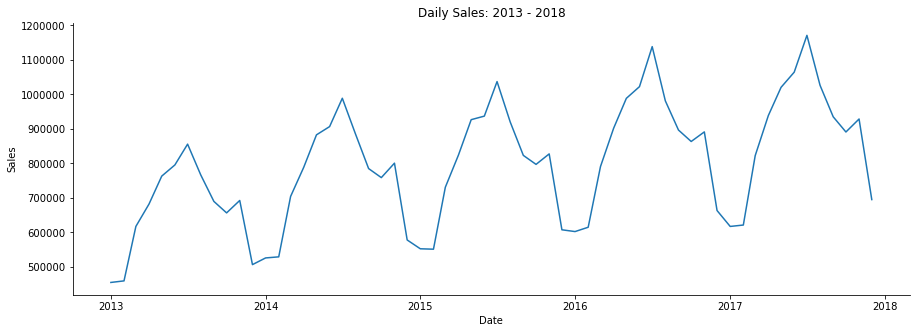

In [13]:
time_plot(monthly_df, 'date', 'sales')

In [14]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('../data/stationary_df.csv')
    return data

In [15]:
stationary_df = get_diff(monthly_df)

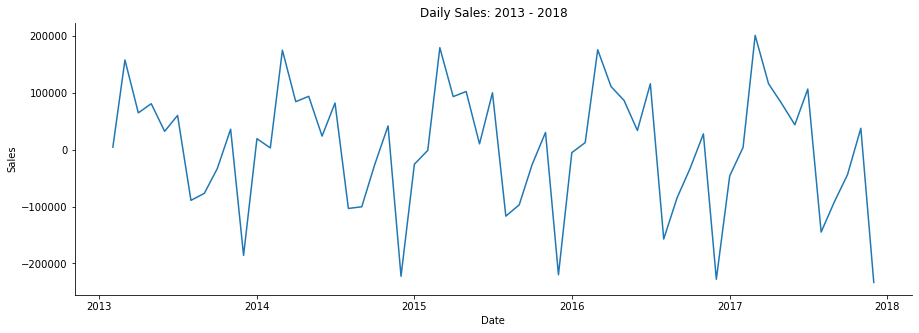

In [16]:
time_plot(stationary_df, 'date', 'sales_diff')

# Preparing Dataset For Modeling

In [17]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    return supervised_df

In [18]:
model_df = generate_supervised(stationary_df)

In [340]:
model_df.to_csv('../data/model_df.csv', index=False)